In [136]:
df['name'][:3]

0    어묵탕
1    연포탕
2    마라탕
Name: name, dtype: object

In [159]:
import requests
from flask import Flask , render_template, request
from bs4 import BeautifulSoup


keywords = df['name'][:3]
headers = {
           "X-Naver-Client-Id": "HyjmsprByr1fqs5XMH6j" ,
            "X-Naver-Client-Secret": "6ngV69kmfz"
        }
food_ls = []
for keyword in keywords:
    response=requests.get('https://openapi.naver.com/v1/search/image?query={}&display=2&start=1&sort=sim&filter=all'.format(keyword),headers=headers)
    # print(response)
    result=response.json()['items']
    print(result)
    print(keyword)
    for i in result:
        print(i['link'])
    
#     if 'news'not in result['link']:
#         food_ls.append(result['link'])
            
    
# for i in food_ls:
#     print(i)

[{'title': '진수미 맑은 어묵탕스프 500g : 겁나로켓', 'link': 'http://shop1.phinf.naver.net/20191205_95/15754755426498Pd3Q_JPEG/v1.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://shop1.phinf.naver.net/20191205_95/15754755426498Pd3Q_JPEG/v1.jpg&type=b150', 'sizeheight': '1000', 'sizewidth': '1000'}, {'title': '초스피드요리~ 어묵탕 맛있게 끓이는법', 'link': 'http://post.phinf.naver.net/20150630_292/hoya1378_14356357073045GQ9z_JPEG/mug_obj_201506301241483839.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/20150630_292/hoya1378_14356357073045GQ9z_JPEG/mug_obj_201506301241483839.jpg&type=b150', 'sizeheight': '600', 'sizewidth': '900'}]
어묵탕
http://shop1.phinf.naver.net/20191205_95/15754755426498Pd3Q_JPEG/v1.jpg
http://post.phinf.naver.net/20150630_292/hoya1378_14356357073045GQ9z_JPEG/mug_obj_201506301241483839.jpg
[{'title': '낙지연포탕 만드는 법', 'link': 'http://post.phinf.naver.net/20161010_276/14760643855951CX1m_JPEG/IdukCOJ90U73Mj6oEydgsxM03qMI.jpg', 'thumbnail': 'https

In [ ]:


results=response.json()['items']


In [66]:
foodname = '보쌈 피자 족발 치킨 라면 스파게티'
foodname.split(' ')

['보쌈', '피자', '족발', '치킨', '라면', '스파게티']

In [72]:
animalname = '다람쥐 강아지  고양이 토끼 고래 코끼리'
animal=animalname.split(' ')

In [75]:
["동물"+i for i in animal]

['동물다람쥐', '동물강아지', '동물악어', '동물고양이', '동물토끼', '동물고래', '동물코끼리']

In [79]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'utf-8'
        html = res.text
    return html

In [113]:
def get_food(page):
    
    from bs4 import BeautifulSoup
    result = get_html('https://100.daum.net/tag/274?sort=vcnt&index=&page={}'.format(page))

    soup = BeautifulSoup(result, 'html.parser')
    nums = soup.select('#mArticle > div > ul > li > div > strong > a')
    food_ls = []
    for temp in nums:
        food_text=temp.text.strip()
        idx = food_text.find('(')
        if idx != -1:
            food_text=food_text[:idx-1]
        if ' ' not in food_text:
            food_ls.append(food_text)
    food_ls=pd.DataFrame(food_ls, columns=['name'])
    return food_ls


In [123]:
import time
a=get_food(1)
for i in range(2,51):
    b=get_food(i)
    a=pd.concat([a,b], axis=0)
    time.sleep(3)
    
a

,name
0,어묵탕
1,연포탕
2,마라탕
3,두리안
4,노니
...,...
11,짬뽕
12,가공식품
13,갈치속젓
14,미역팽이버섯초무침


In [124]:
a.to_csv('food.csv', index=False, encoding='utf-8')

In [125]:
df = pd.read_csv("food.csv", encoding ='utf-8')

In [130]:
for i in df['name'][:3]:
    

어묵탕
연포탕
마라탕


In [ ]:
#_sau_imageTab > div.photowall._photoGridWrapper > div.photo_grid._box > div:nth-child(1) > a.thumb._thumb > img


In [206]:
from bs4 import BeautifulSoup
keys='어묵탕'
result = get_html('https://search.naver.com/search.naver?where=image&sm=tab_jum&query={}'.format(keys))

soup = BeautifulSoup(result, 'html.parser')
nums = soup.select_one('#_sau_imageTab > div.photowall._photoGridWrapper > div.photo_grid._box > div:nth-child(1) > a.thumb._thumb > img')
img=nums.attrs['data-source']

In [198]:
! pip install cStringIO

  ERROR: Could not find a version that satisfies the requirement cStringIO (from versions: none)
ERROR: No matching distribution found for cStringIO


In [207]:
from PIL import Image 
import requests
from io import BytesIO
response = requests.get(img)
img = Image.open(BytesIO(response.content))
# img.show()

In [208]:
# img.show()

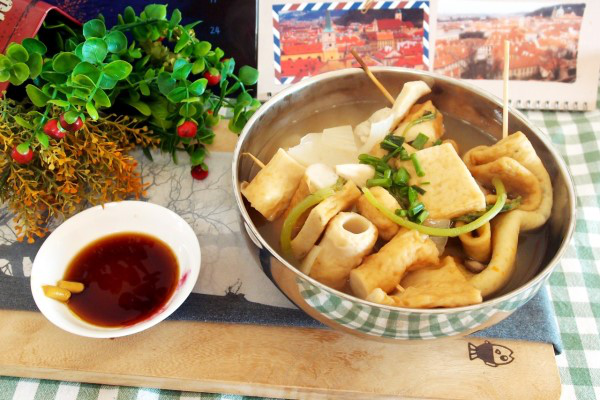

In [212]:
display(img)

In [ ]:
img_ls = []
for temp in nums:
    food_text=temp.text.strip()
    idx = food_text.find('(')
    if idx != -1:
        food_text=food_text[:idx-1]
    if ' ' not in food_text:
        food_ls.append(food_text)
food_ls=pd.DataFrame(food_ls, columns=['name'])